Exploring Polysemantic Universality with Embeddings
=====================================================

Check out the blog post here: [Polysemantic Universality](https://danieljmwilliams.github.io/DanielJMWilliams/posts/AISFProject/)

For setup instructions see the [README](/README.md).




# Set Up Notebook

In [1]:
# setup notebook for interactive graphs in Visual Studio Code
#%matplotlib widget

In [2]:
# configure toggles. You may wish to set these to false to save memory and time.
load_google_news = False
load_glove = False
load_brown_corpus = True

## Set up corpuses

In [3]:
from MinimalCorpus import MinimalCorpus as corpora
print(corpora.corpus_translate)

[['Tak', 'Yes', 'Polish'], ['Nie', 'No', 'Polish'], ['Oui', 'Yes', 'French'], ['Non', 'No', 'French'], ['Ja', 'Yes', 'German'], ['Nein', 'No', 'German']]


In [4]:
import nltk
from nltk.corpus import brown

if load_brown_corpus:
    nltk.download('brown')
    corpus_brown = brown.sents()


[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\danca\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!


## Load pretrained embeddings models

In [5]:
# dictionary to hold all loaded models.
# Use loaded_models["model_name"] = model to add models to this dictionary
# Acces models in this dictionary using loaded_models["{name_of_model}"]
loaded_models = {}

In [6]:
#wrap glove and google news so they can be treated in the same way as the models we will train.
class wrapper:
  def __init__(self, model):
    self.wv = model
    self.vector_size = model.vector_size
  
  def __str__(self) -> str:
    return f"model<vocab=?, vector_size={self.vector_size}>"

In [7]:
import gensim.downloader as api

if load_google_news:
    model_google_news = api.load('word2vec-google-news-300')
    model_google_news_wrapped = wrapper(model_google_news)
    loaded_models["google_news"] = model_google_news_wrapped
    print("google news loaded")

In [8]:
if load_glove:
    model_glove = api.load("glove-wiki-gigaword-50")
    model_glove_wrapped = wrapper(model_glove)
    loaded_models["glove"] = model_glove_wrapped
    print("glove loaded")

# Experiments

## Approach 1: Observing Polysemantic Relationships as Dimensionality Decreases

I believed that a good way to understand polysemantic relationships would be to train embeddings models with just a handful of words with, at first sufficient dimensions to sparsely encode all the words i.e. all words in vector space orthogonal to each other - no interference.
Then, reduce the number of dimensions to force the model to superpose words in some dimensions - interference.


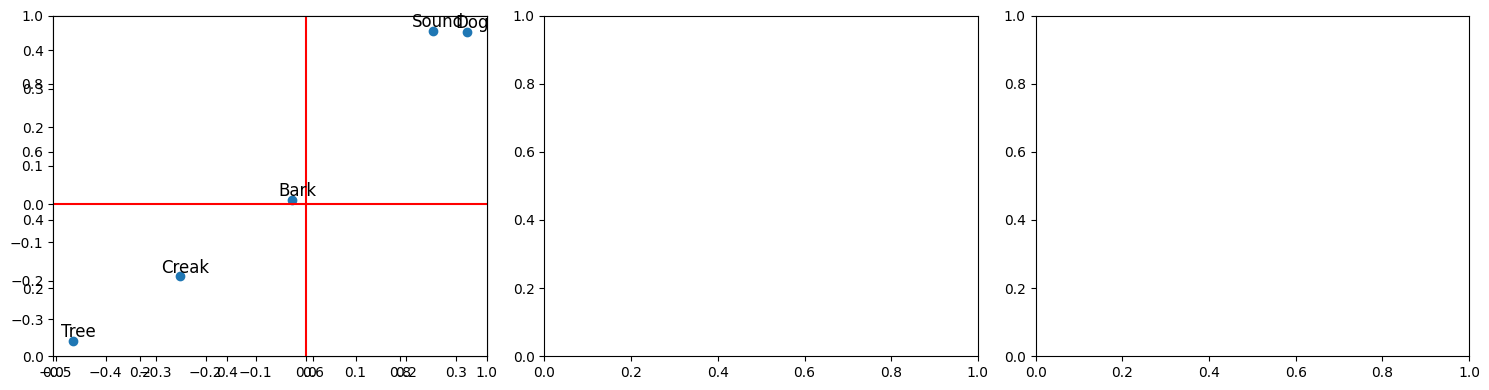

In [9]:
import numpy as np
from Utils import VectorUtils, ModelUtils, GraphUtils

def train(corpus, dimensions):
  vocab = ModelUtils.corpus_vocab(corpus)
  model = ModelUtils.train_model(corpus, dimensions)
  return model, vocab

model, vocab = train(corpora.corpus_bark, 2)
data = ModelUtils.prepare_word_plots(vocab, model, dimensions_to_plot=[0,1])

GraphUtils.render_multiple_graphs([data])


In [10]:
def train_and_prepare_graphs(corpus, dimensions):
    all_data = []
    model, vocab = train(corpus, dimensions)
    for i in range(0, dimensions):
        for j in range(i, dimensions):
            if i!=j:
                data = ModelUtils.prepare_word_plots(vocab, model, dimensions_to_plot=[i,j])
                data["title"] = f"{dimensions} dimensions: {i}, {j}"
                all_data.append(data)
    return all_data

'''
all_data = []
data = train_and_prepare_graphs(corpora.corpus_bark, 2)
data2 = train_and_prepare_graphs(corpora.corpus_bark, 3)
data3 = train_and_prepare_graphs(corpora.corpus_bark, 4)
all_data.extend(data)
all_data.extend(data2)
all_data.extend(data3)
GraphUtils.render_multiple_graphs(all_data)
'''


'\nall_data = []\ndata = train_and_prepare_graphs(corpora.corpus_bark, 2)\ndata2 = train_and_prepare_graphs(corpora.corpus_bark, 3)\ndata3 = train_and_prepare_graphs(corpora.corpus_bark, 4)\nall_data.extend(data)\nall_data.extend(data2)\nall_data.extend(data3)\nGraphUtils.render_multiple_graphs(all_data)\n'

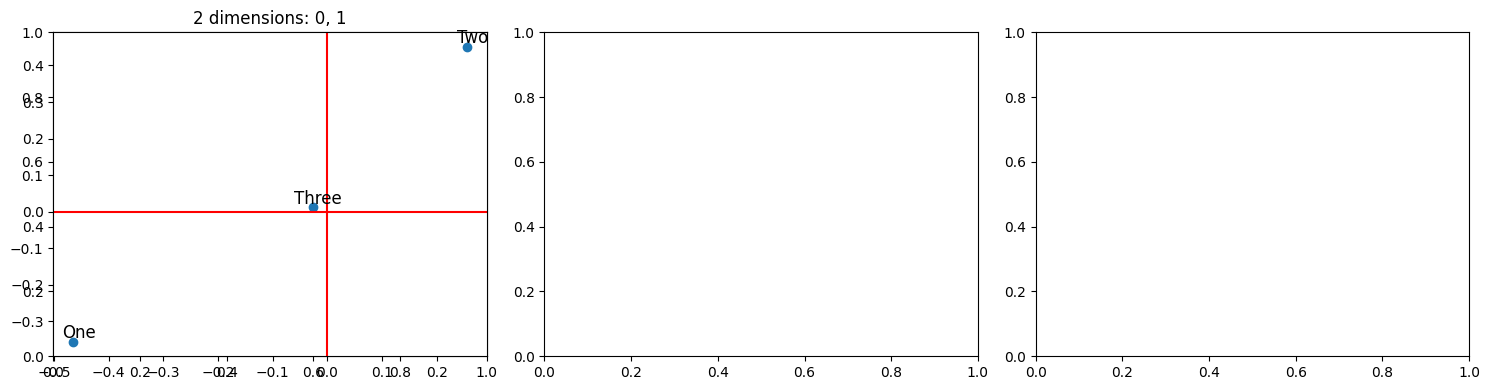

In [11]:
data = train_and_prepare_graphs(corpora.corpus_3, 2)
GraphUtils.render_multiple_graphs(data)

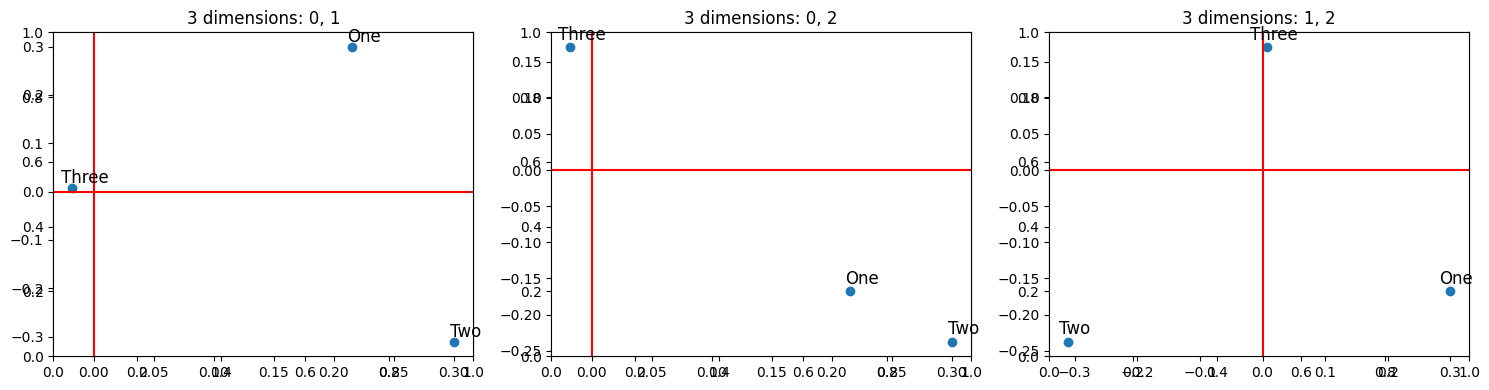

In [12]:
data = train_and_prepare_graphs(corpora.corpus_3, 3)
GraphUtils.render_multiple_graphs(data)

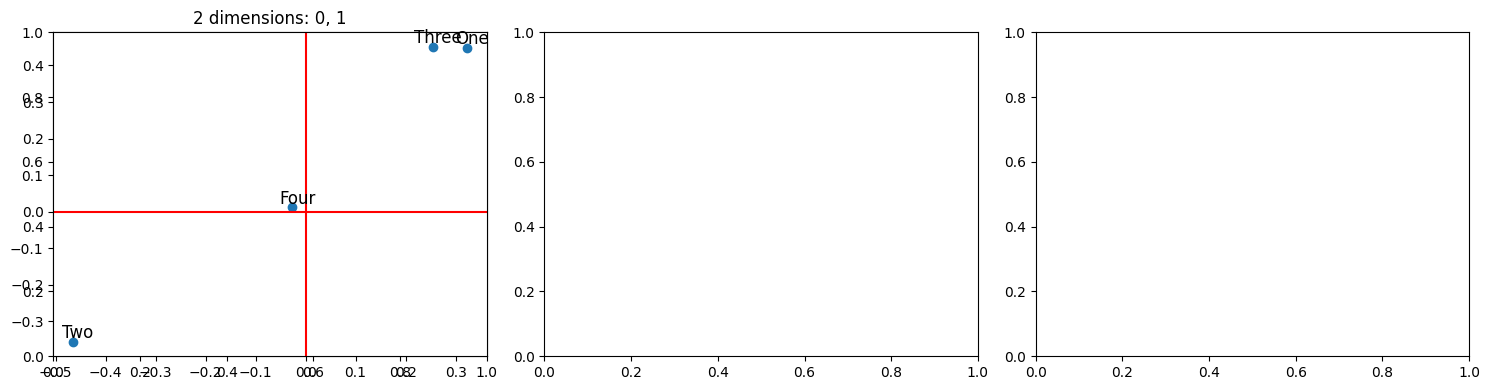

In [13]:
data = train_and_prepare_graphs(corpora.corpus_4, 2)
GraphUtils.render_multiple_graphs(data)

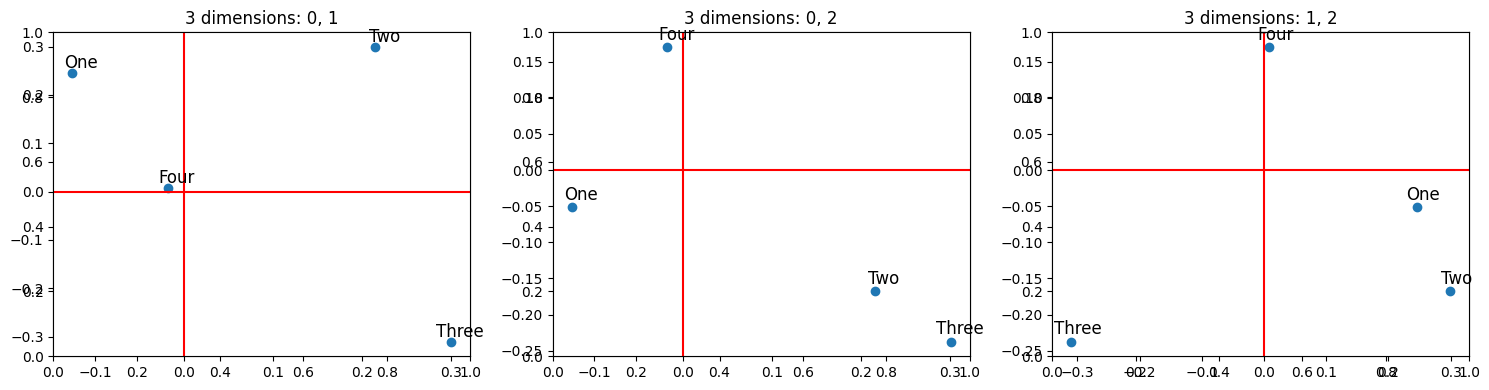

In [14]:
data = train_and_prepare_graphs(corpora.corpus_4, 3)
GraphUtils.render_multiple_graphs(data)

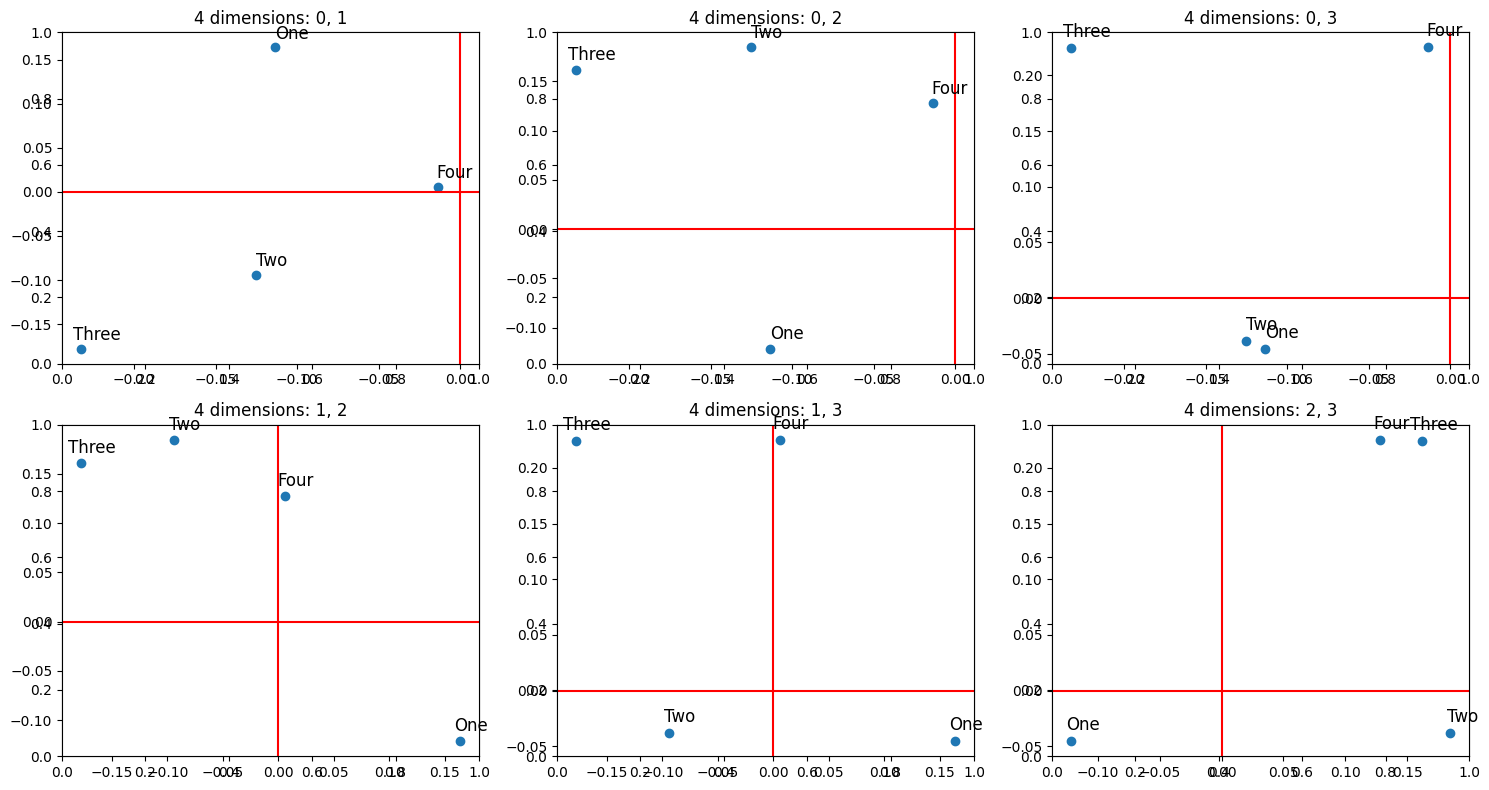

In [15]:
data = train_and_prepare_graphs(corpora.corpus_4, 4)
GraphUtils.render_multiple_graphs(data)

bark has very small magnitude because it is the least discriminating.

sound has the most different vector as it is the most discriminating (on par with dog and creak and sound)

dog and tree have similar vectors even though they don't co-occur, is this interference? i think so

In [16]:
model, vocab, graph = train_and_plot(corpus_capital, 3)

NameError: name 'train_and_plot' is not defined

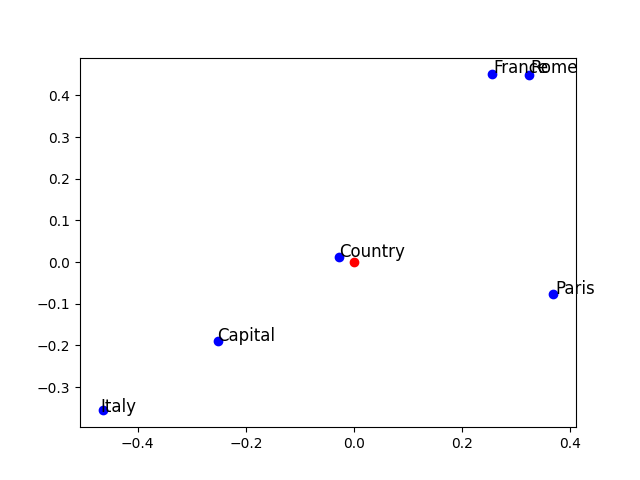

In [ ]:
model, vocab, graph = train_and_plot(corpus_capital_small, 2)

In [ ]:
print(model.wv.cosine_similarities(model.wv["Italy"], [model.wv["Rome"]]))
print(model.wv.cosine_similarities(model.wv["France"], [model.wv["Rome"]]))
print(model.wv.cosine_similarities(model.wv["Italy"], [model.wv["Paris"]]))
print(model.wv.cosine_similarities(model.wv["Italy"], [model.wv["France"]]))
print(model.wv.cosine_similarities(model.wv["France"], [model.wv["Paris"]]))
print(model.wv.cosine_similarities(model.wv["Country"], [model.wv["Capital"]]))


[-0.95713264]
[0.99411845]
[-0.6540318]
[-0.92013484]
[0.30556372]
[0.48973966]


Above, Italy and Rome are about as dissimilar as possible and France and Rome are very similar. I believe this may be the interference (or superposition) of France and Rome. 

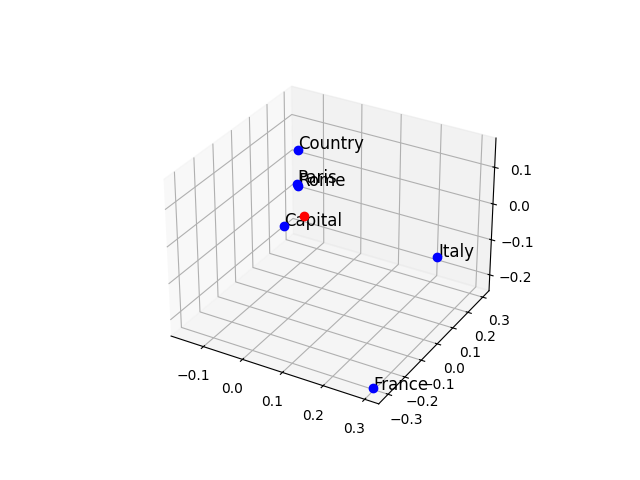

In [ ]:
model, vocab, graph = train_and_plot(corpus_capital_small, 3)

In 3 dimensions, it seems it has learned distinct directions for Italy, France, Country and Capital

In [ ]:
print(model.wv.cosine_similarities(model.wv["Italy"], [model.wv["Rome"]]))
print(model.wv.cosine_similarities(model.wv["France"], [model.wv["Rome"]]))
print(model.wv.cosine_similarities(model.wv["Italy"], [model.wv["Paris"]]))
print(model.wv.cosine_similarities(model.wv["Italy"], [model.wv["France"]]))
print(model.wv.cosine_similarities(model.wv["France"], [model.wv["Paris"]]))
print(model.wv.cosine_similarities(model.wv["Country"], [model.wv["Capital"]]))
print(model.wv.cosine_similarities(model.wv["Country"], [model.wv["France"]]))
print(model.wv.cosine_similarities(model.wv["Country"], [model.wv["Italy"]]))

[0.485004]
[-0.73615366]
[0.21170624]
[0.05801837]
[-0.95833105]
[-0.43415615]
[-0.5710873]
[-0.4319441]


The cosine similarity ranges from -1 to 1:
1: Indicates identical vectors (perfect similarity).
0: Implies no similarity (orthogonal vectors).
-1: Represents opposite vectors (maximum dissimilarity).

### Analysis
- the graphs of the minimal embeddings models turned out not to be as intuitive as I had hoped.

## Approach 2: Similar Words to Unintuitive Vectors

Another approach to finding polysemantic relationships we took was to choose two seemingly unrelated words, compute the direction between their vectors and see what words are most similar to that resulting vector. The hope was that the words most similar to this vector would be similar across different models, indicating that dissimilar things are learned similarly.

In [ ]:
def compare(models, pairs):
    print("\n")
    for model in models:
        for pair in pairs:
            v = model.wv[pair[0]] - model.wv[pair[1]]
            print(model.wv.most_similar(v))
    

compare([loaded_models["glove"], loaded_models["google_news"]], [("squirrel", "phone")])
compare([loaded_models["glove"], loaded_models["google_news"]], [("potato", "square")])
compare([loaded_models["glove"], loaded_models["google_news"]], [("poland", "yoga")])

KeyError: 'glove'

These few tests do not seem promising for the idea. Often the similar word is very similar to the original word. 

e.g. the most similar vector to poland-yoga is still poland. This means that either:
1. yoga has a small magnitude
2. yoga does not interfere with poland

We want to find a pair of words that reliably produces an unintuitive word when subtracted from each other, but this method of finding them is a searching for a needle in a hay stack approach. How should we do it instead?

Perhaps I need to look at the vectors and see which dimensions change.

## Approach 3: Similar Words in Individual Dimensions

In Toy Models of superposition, individual neurons were visualised by generating an image that causes maximal activation of the neuron. For polysemantic neurons, this resulted in very different images for repeat runs. (check)
With embeddings, we can find the most similar words to a vector with a single dimension set to its maximum while all other dimensions remain zero. We will call these words the "dimension words" for ease of reference.
If a dimension mostly responds to one kind of feature, i.e. is monosemantic, we would expect its dimension words to all be fairly similar.
If the dimension's words are all seemingly quite different, it indicates the dimension may be polysemantic.

We are interested to see if different models learn similar dimension words. And whether any dimension words occur across multiple dimensions in a model.

In [ ]:
#model_sizes = [10,20,50,300,3,4,5]
model_sizes = [3, 50]

brown_models = {}
for size in model_sizes:
    model_name = f"brown_{size}"
    print(f"training {model_name}")
    loaded_models[model_name] = train_model(corpus_brown, size)
    print(f"loaded {model_name}")


training brown_3
loaded brown_3
training brown_50
loaded brown_50


In [ ]:
import pandas as pd

# Define the columns
columns = ['model', 'dimensions', 'dimension', 'similar words (similarity)']

# Example data
data = []

class ModelResults:
    def __init__(self, model, model_name) -> None:
        self.model_name = model_name
        self.model = model
        self.similar_words = []
    
    # returns the most similar words to the vector maxed out in one dimension
    def max_dimension_words(self, top=5):
        min_values, max_values = self.max_dimension(model)
        for i in range(self.model.vector_size):
            max_magnitude = max_values[i]
            max_vector = np.zeros(self.model.vector_size)
            max_vector[i] = max_magnitude
            similar_words =self.model.wv.most_similar(max_vector)[:top]
            self.similar_words.append(similar_words)
    
    def max_dimension(self, model):
        vectors = np.array(model.wv.vectors)
        max_values = np.max(vectors, axis=0)
        min_values = np.min(vectors, axis=0)
        return min_values, max_values

    
    def __str__(self) -> str:
        return f"{self.model_name} - {self.model} - {self.similar_words[0]} "

    def toRows(self):
        rows = []
        for i in range(self.model.vector_size):
            row = {
                "model": self.model_name,
                "dimensions": self.model,
                "dimension": i,
                "similar words (similarity)": self.similar_words[i]
            }
            rows.append(row)
        return rows
    
    def get_similar_flat(self):
        #flatten similar words list of lists
        flat_list = [
            x
            for xs in self.similar_words
            for x in xs
        ]
        return flat_list




mr = ModelResults(loaded_models["brown_3"], "model_brown_3")
mr.max_dimension_words()
#print(mr)

# Create DataFrame from the list of dictionaries
df = pd.DataFrame(mr.toRows(), columns=columns)
# Set display options
pd.set_option('display.max_colwidth', None)  # or a large integer like 1000
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)  # Set a large width to accommodate all columns

# Display the DataFrame
print(df)



           model                                         dimensions  dimension                                                                                                                                              similar words (similarity)
0  model_brown_3  Word2Vec<vocab=56057, vector_size=3, alpha=0.025>          0  [(maxim, 0.9716106057167053), (Compassionately, 0.9699593186378479), (Snapped, 0.9691370725631714), (gulley, 0.9672483205795288), (upperclassmen, 0.9636327624320984)]
1  model_brown_3  Word2Vec<vocab=56057, vector_size=3, alpha=0.025>          1               [(138, 0.9998131990432739), (Plants, 0.9997149109840393), (Galatians, 0.9981017112731934), (Innumerable, 0.9974613189697266), (Noon, 0.9970058798789978)]
2  model_brown_3  Word2Vec<vocab=56057, vector_size=3, alpha=0.025>          2             [(retina, 0.9999991655349731), (conquests, 0.9999923706054688), (alleging, 0.999992311000824), (manages, 0.9999904632568359), (judges, 0.9999873638153076)]


In [ ]:
results = []
model_results = []
for model_name, model in loaded_models.items():
    mr = ModelResults(model, model_name)
    mr.max_dimension_words()
    results = results + mr.toRows()
    model_results.append(mr)

df = pd.DataFrame(results, columns=columns)
# Display the DataFrame
df

model                                          dimensions  dimension                                                                                                                                                                                             similar words (similarity)
0    google_news                     model<vocab=?, vector_size=300>          0                                       [(apocalyptic_prophesy, 0.25545403361320496), (Mythica, 0.24702315032482147), (sits_enthroned, 0.2460421621799469), (wcg, 0.2410862147808075), (Setup_Tool, 0.2381514608860016)]
1    google_news                     model<vocab=?, vector_size=300>          1                                                               [(Shin_Dong, 0.2600080668926239), (Hyon, 0.2565069794654846), (Millett, 0.25122904777526855), (Kwon, 0.24837884306907654), (Achar, 0.24678219854831696)]
2    google_news                     model<vocab=?, vector_size=300>          2       [(CAS_arbitrators, 0.24584147334098816), (Mark_Kornblau_spokesman, 0.2425474226474762), (particle_accelerator, 0.23843829333782196), (Mithi_Virdi, 0.23499388992786407), (atomic_arsenals, 0.23447048664093018)]
3    google_news                     model<vocab=?, vector_size=300>          3                                  [(Ginsburgs, 0.28120988607406616), (Dinty_Moore, 0.2802680432796478), (jelly_sandwiches, 0.2788439691066742), (heartier_appetites, 0.2741965055465698), (they'd, 0.2711051106452942)]
4    google_news                     model<vocab=?, vector_size=300>          4  [(Exemplary_Teaching, 0.2654290795326233), (Terrell_Vinson, 0.26017850637435913), (Onyekwe, 0.2501116991043091), (pivot_Anthony_Calvillo, 0.2497139871120453), (Brent_Shepheard_Shawnigan_Lake, 0.24609020352363586)]
..           ...                                                 ...        ...                                                                                                                                                                                                                    ...
398     brown_50  Word2Vec<vocab=56057, vector_size=50, alpha=0.025>         45                                                             [(own, 0.24415215849876404), (private, 0.23707878589630127), (Frame, 0.23584944009780884), (Impatiently, 0.23030687868595123), (5.4, 0.22425812482833862)]
399     brown_50  Word2Vec<vocab=56057, vector_size=50, alpha=0.025>         46                                                                        [(against, 0.3843061923980713), (or, 0.33320024609565735), (gun, 0.32916224002838135), (eye, 0.3285648822784424), (stock, 0.32652953267097473)]
400     brown_50  Word2Vec<vocab=56057, vector_size=50, alpha=0.025>         47                                    [(Subsystems, 0.24672231078147888), (Trim-your-own-franks, 0.22964060306549072), (Calves, 0.21520383656024933), (Advantages, 0.1887025535106659), (Astronomy, 0.18629662692546844)]
401     brown_50  Word2Vec<vocab=56057, vector_size=50, alpha=0.025>         48                                                               [(others, 0.3904684782028198), (something, 0.35384514927864075), (felt, 0.34959647059440613), (couldn't, 0.3365239202976227), (men, 0.3362550139427185)]
402     brown_50  Word2Vec<vocab=56057, vector_size=50, alpha=0.025>         49                                                        [(Oxidation, 0.3078239858150482), (2.1.6, 0.3016475737094879), (Expresses, 0.29349055886268616), (Coolest, 0.28849294781684875), (Clearer, 0.2793249487876892)]

[403 rows x 4 columns]

In [ ]:

# Export DataFrame to Excel
df.to_excel('output.xlsx', index=False, engine='openpyxl')

print("DataFrame exported to Excel successfully.")


DataFrame exported to Excel successfully.


DataFrame exported to Excel successfully.


Identifying words that occur across different dimensions:

In [ ]:
word_sets = []
for result in model_results:
    print(f"\n{result.model_name}")
    model_words = [ word for word, _ in result.get_similar_flat()]
    #print(model_words)
    model_words_set = set(model_words)
    duplicate_words = set([x for x in model_words if model_words.count(x) > 1])
    print(f"duplicate words: {len(duplicate_words)} - {duplicate_words}")
    word_sets.append(model_words_set)



google_news
duplicate words: 2 - {'IBD_TIPP_Presidential', 'grubber'}

glove
duplicate words: 0 - set()

brown_3
duplicate words: 0 - set()

brown_50
duplicate words: 23 - {'cent', 'She', 'Proprietorship', 'Astronomy', 'Meats', 'Plants', 'Undergraduates', 'Trim-your-own-franks', 'Advantages', 'Subsystems', 'Achieving', 'Status-roles', 'Movies', "don't", 'no', 'Thirty-six', 'Norms', 'Backbends', 'Nightclubs', 'Mrs.', 'their', 'Boonton', 'Sulfaquinoxaline'}


Identifying dimension words that occur across across models

In [ ]:
print("Lets see what words the models have in common in the individual dimensions")
for i in range(len(model_results)):
    for j in range(i, len(model_results)):
        if(i!=j):
            common_strings = word_sets[i].intersection(word_sets[j])
            print(f"\n{model_results[i].model_name} and {model_results[j].model_name} common: {len(common_strings)} -", common_strings)


Lets see what words the models have in common in the individual dimensions

google_news and glove common: 0 - set()

google_news and brown_3 common: 0 - set()

google_news and brown_50 common: 0 - set()

glove and brown_3 common: 0 - set()

glove and brown_50 common: 1 - {'with'}

brown_3 and brown_50 common: 1 - {'Plants'}


:( I was hoping to see several overlapping words across models indicating that similar dimensions are learned.

I guess it could learn opposite dimensions e.g. one learns 'her' feature other learns 'him'.

To be fair though, the google news corpus seems to have contained a lot more 'rare' vocab

# thoughts
for topics to be interfering, they have to be unrelated and non-co-occurring but close in vector space. Is this even possible given how embeddings work?

when I asked about the difference between a car and a potato, he proceded to list certain differences such as not living, natural/unnatural, made out of components,

I suppose more what the difference is, is not the difference between their concepts, but the difference in how they occur in text - these things are related but not the same.

rearranging the equation may help understand.



136.42792

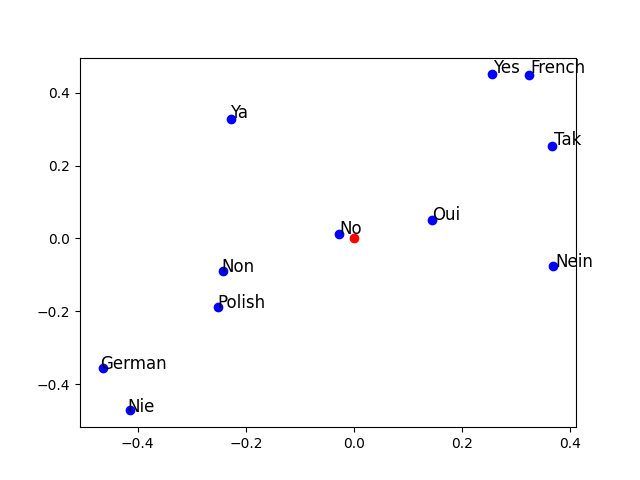

In [ ]:


corpus_minimal = [
    ["Tak", "Yes", "Polish"],
    ["Nie", "No", "Polish"],
    ["Oui", "Yes", "French"],
    ["Non", "No", "French"],
    ["Ya", "Yes", "German"],
    ["Nein", "No", "German"],
]
model, vocab, graph = train_and_plot(corpus_minimal, 2)
angle_between_vectors(model.wv["Yes"], model.wv["No"])
angle_between_vectors(model.wv["Tak"], model.wv["Nie"])
angle_between_vectors(model.wv["Ya"], model.wv["Nein"])


Cosine similarity:  -0.5711242
Angle:  124.82865


124.82865

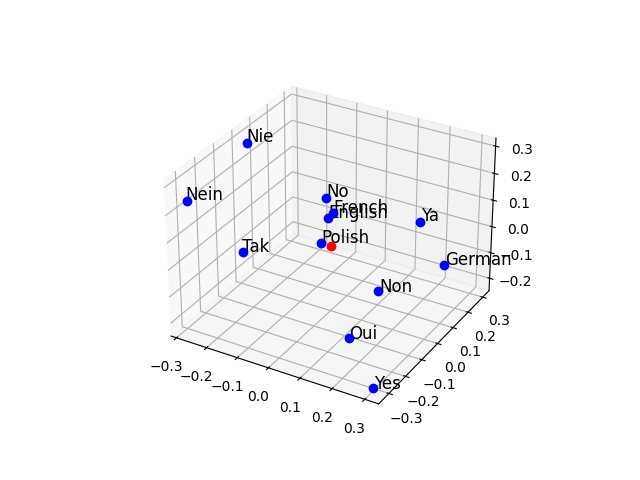

In [ ]:
model, vocab, graph = train_and_plot(corpus_minimal, 3)
angle_between_vectors(model.wv["Yes"], model.wv["No"])

Cosine similarity:  0.7010762
Angle:  45.486584


45.486584

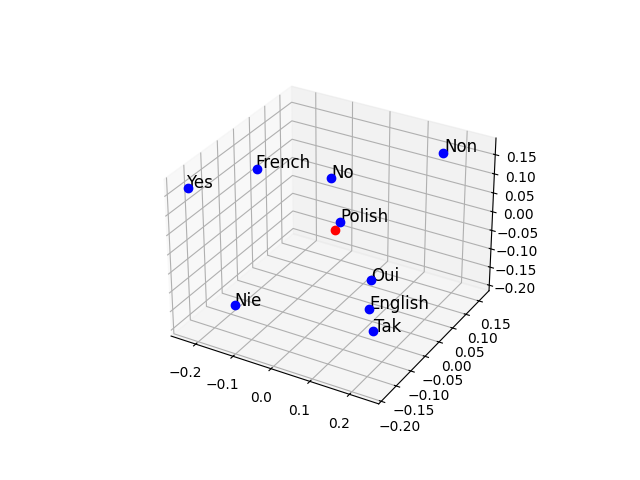

In [ ]:
model, vocab, graph = train_and_plot(corpus_minimal, 4)
angle_between_vectors(model.wv["Yes"], model.wv["No"])

Cosine similarity:  0.20182943
Angle:  78.35603


78.35603

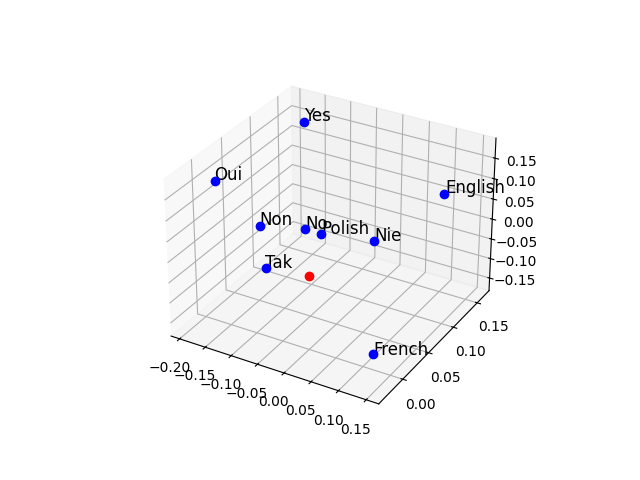

In [ ]:
model, vocab, graph = train_and_plot(corpus_minimal, 5)
angle_between_vectors(model.wv["Yes"], model.wv["No"])

Cosine similarity:  -0.51296544
Angle:  120.86156


120.86156

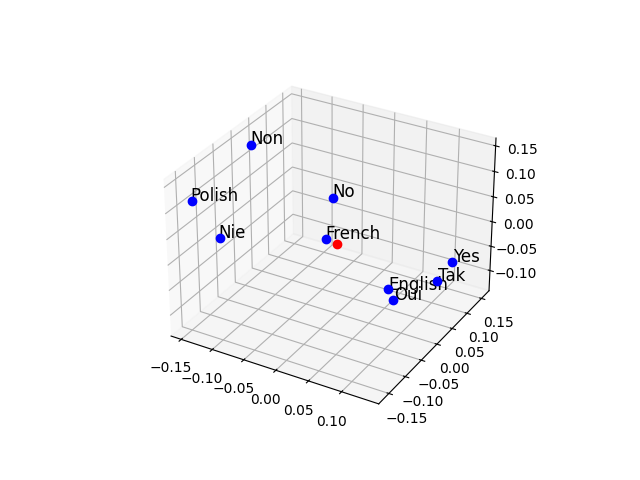

In [ ]:
model, vocab, graph = train_and_plot(corpus_minimal, 6)
angle_between_vectors(model.wv["Yes"], model.wv["No"])

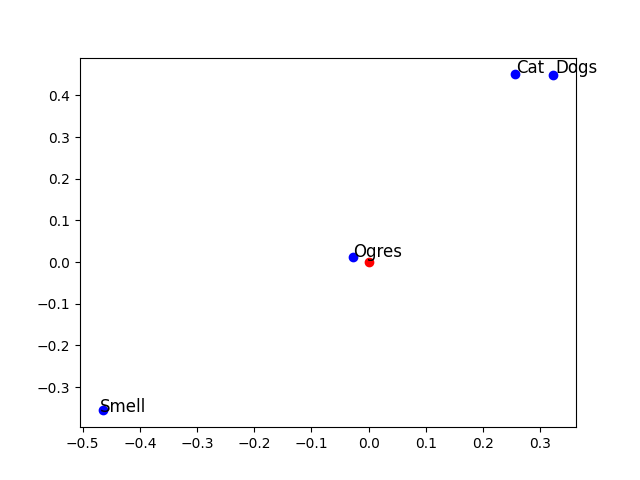

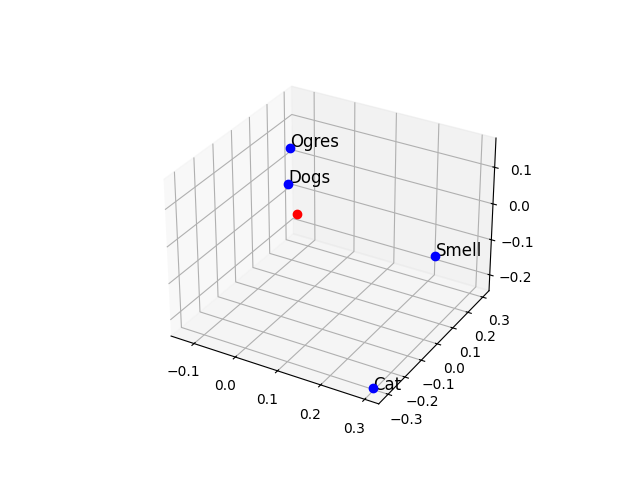

In [ ]:
corpus_minimal = [
    ["Dogs", "Smell"],
    ["Cat"],
    ["Ogres"],
]
model, vocab, graph = train_and_plot(corpus_minimal, 2)
model, vocab, graph = train_and_plot(corpus_minimal, 3)

Cosine similarity:  -0.099947445
Angle:  95.73614


95.73614

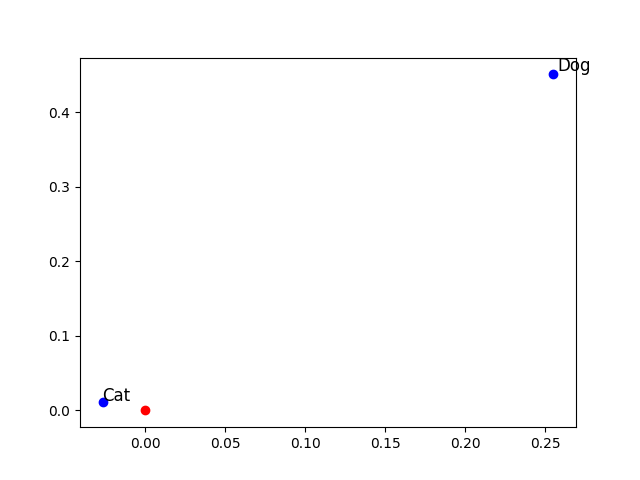

In [ ]:
corpus_minimal = [
    ["Dog"],
    ["Cat"]
]
model, vocab, graph = train_and_plot(corpus_minimal, 2)
angle_between_vectors(model.wv["Dog"], model.wv["Cat"]) # even with sufficient dimensions, vectors are not quite orthogonal

Cosine similarity:  -0.92013484
Angle:  156.9458
Cosine similarity:  0.05801837
Angle:  86.67392


86.67392

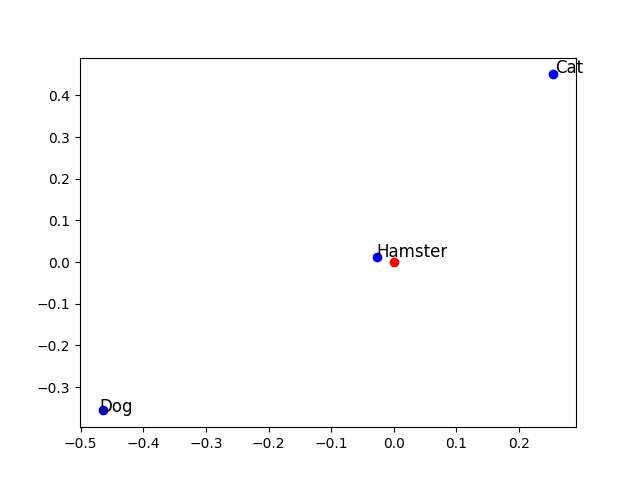

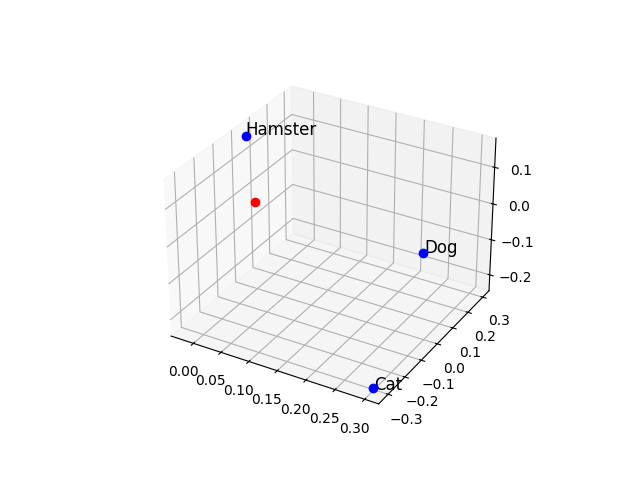

In [ ]:
corpus_minimal = [
    ["Dog"],
    ["Cat"],
    ["Hamster"]
]
model, vocab, graph = train_and_plot(corpus_minimal, 2)
angle_between_vectors(model.wv["Dog"], model.wv["Cat"])

model, vocab, graph = train_and_plot(corpus_minimal, 3)
angle_between_vectors(model.wv["Dog"], model.wv["Cat"]) # as dimensions increase, vectors become closer to orthogonal

Cosine similarity:  -0.95713264
Angle:  163.163
Cosine similarity:  0.485004
Angle:  60.987263
Cosine similarity:  -0.3752929
Angle:  112.04241


112.04241

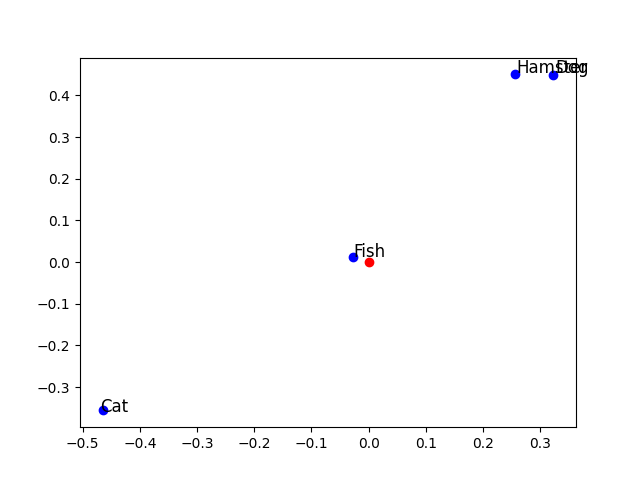

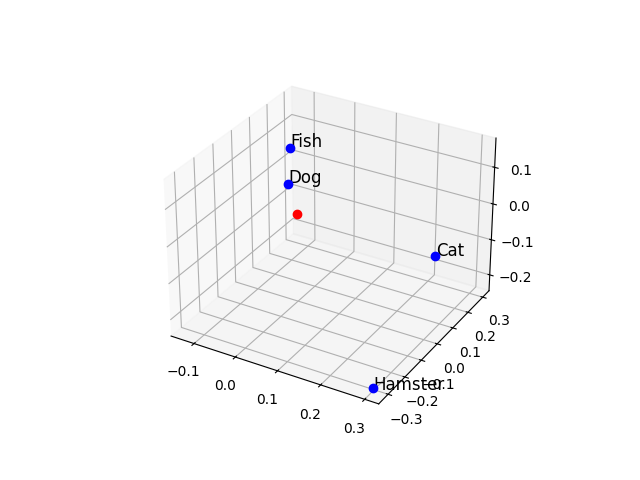

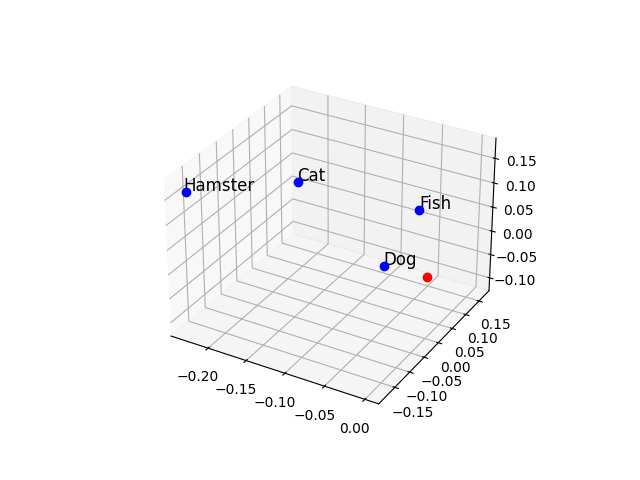

In [ ]:
corpus_minimal = [
    ["Dog"],
    ["Cat"],
    ["Hamster"],
    ["Fish"]
]
model, vocab, graph = train_and_plot(corpus_minimal, 2)
angle_between_vectors(model.wv["Dog"], model.wv["Cat"])

model, vocab, graph = train_and_plot(corpus_minimal, 3)
angle_between_vectors(model.wv["Dog"], model.wv["Cat"])

model, vocab, graph = train_and_plot(corpus_minimal, 4)
angle_between_vectors(model.wv["Dog"], model.wv["Cat"]) 

Cosine similarity:  -0.9543961
Angle:  162.62987
Cosine similarity:  0.9267787
Angle:  22.06189
Cosine similarity:  0.4137252
Angle:  65.560936
Cosine similarity:  -0.3469331
Angle:  110.299835


110.299835

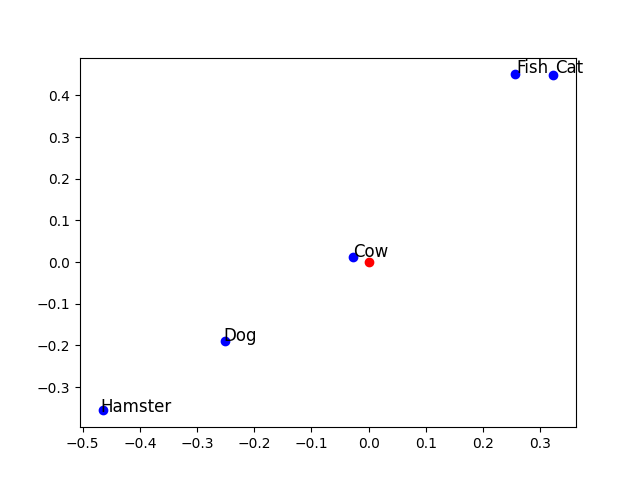

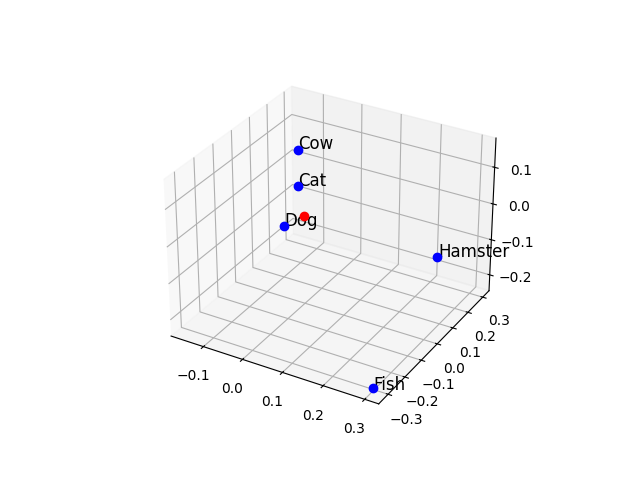

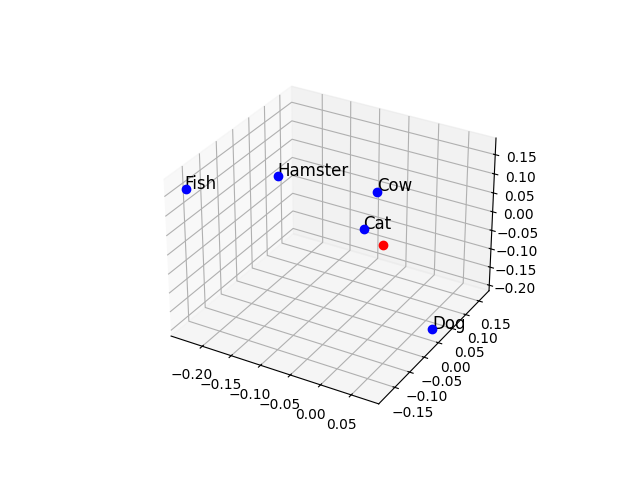

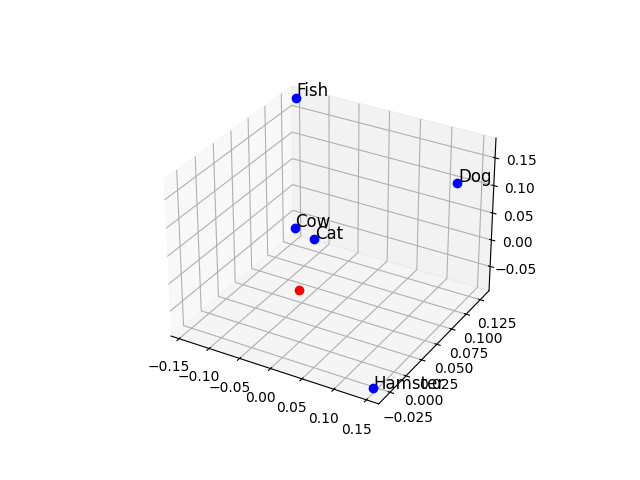

In [ ]:
corpus_minimal = [
    ["Dog"],
    ["Cat"],
    ["Hamster"],
    ["Fish"],
    ["Cow"]
]
model, vocab, graph = train_and_plot(corpus_minimal, 2)
angle_between_vectors(model.wv["Dog"], model.wv["Cat"])

model, vocab, graph = train_and_plot(corpus_minimal, 3)
angle_between_vectors(model.wv["Dog"], model.wv["Cat"])

model, vocab, graph = train_and_plot(corpus_minimal, 4)
angle_between_vectors(model.wv["Dog"], model.wv["Cat"]) 

model, vocab, graph = train_and_plot(corpus_minimal, 5)
angle_between_vectors(model.wv["Dog"], model.wv["Cat"])
# as dimensions increase, vectors become close to othogonal,
#but the more words there are the less close it gets to orthogonal

Cosine similarity:  -0.6610422
Angle:  131.37941
Cosine similarity:  0.6732196
Angle:  47.683952
Cosine similarity:  -0.25645384
Angle:  104.85974
Cosine similarity:  -0.15349129
Angle:  98.8293
Cosine similarity:  -0.38645235
Angle:  112.733925


112.733925

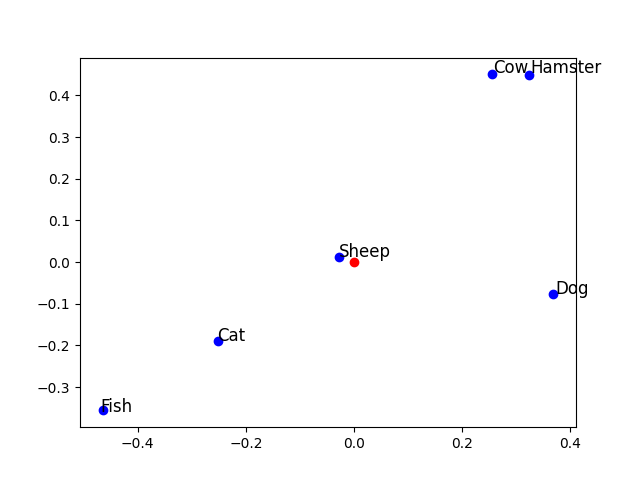

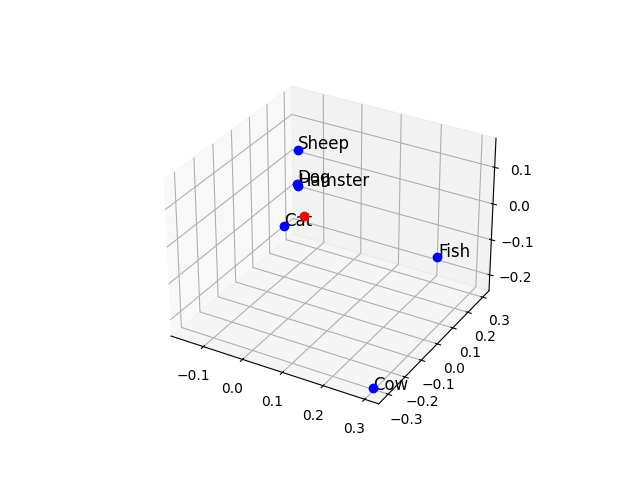

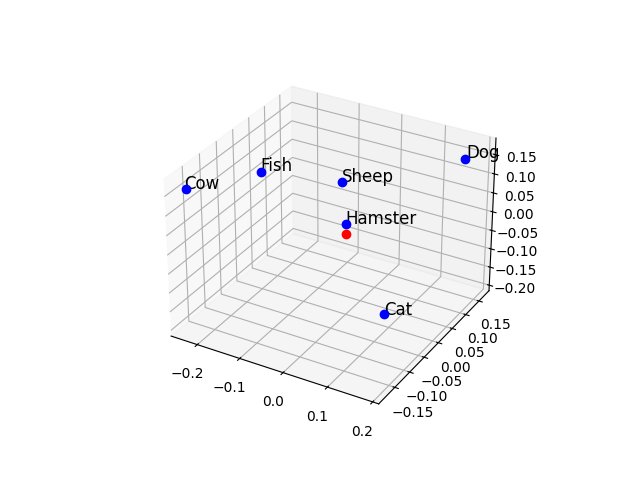

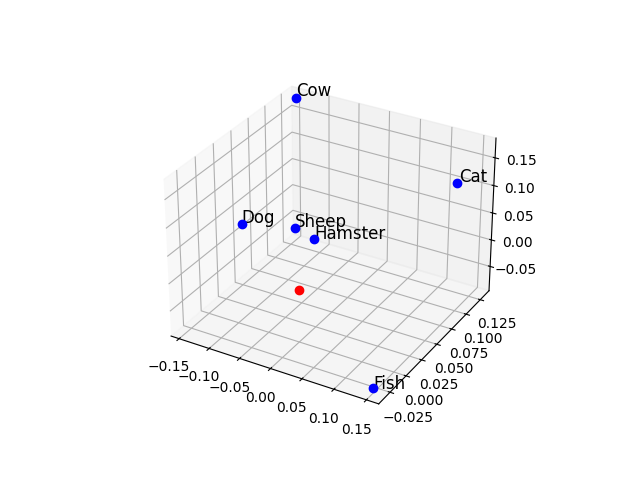

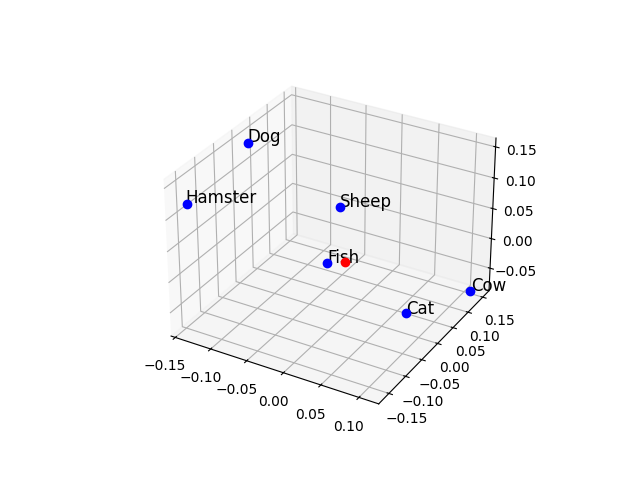

In [ ]:
corpus_minimal = [
    ["Dog"],
    ["Cat"],
    ["Hamster"],
    ["Fish"],
    ["Cow"],
    ["Sheep"]
]
model, vocab, graph = train_and_plot(corpus_minimal, 2)
angle_between_vectors(model.wv["Dog"], model.wv["Cat"])

model, vocab, graph = train_and_plot(corpus_minimal, 3)
angle_between_vectors(model.wv["Dog"], model.wv["Cat"])

model, vocab, graph = train_and_plot(corpus_minimal, 4)
angle_between_vectors(model.wv["Dog"], model.wv["Cat"]) 

model, vocab, graph = train_and_plot(corpus_minimal, 5)
angle_between_vectors(model.wv["Dog"], model.wv["Cat"])

model, vocab, graph = train_and_plot(corpus_minimal, 6)
angle_between_vectors(model.wv["Dog"], model.wv["Cat"])
# as dimensions increase, vectors become close to othogonal - Not true anymore

Cosine similarity:  -0.72450775
Angle:  136.42792
Cosine similarity:  -0.09475686
Angle:  95.43732
Cosine similarity:  0.261509
Angle:  74.84037
Cosine similarity:  0.93238854
Angle:  21.18974
Cosine similarity:  -0.032080267
Angle:  91.83838
Cosine similarity:  -0.19121933
Angle:  101.02394


101.02394

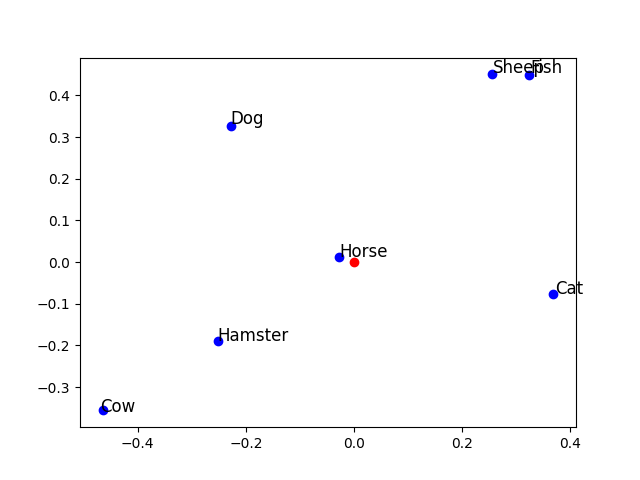

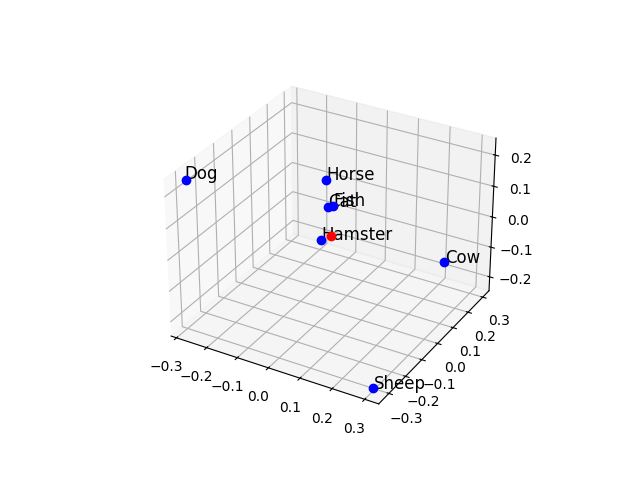

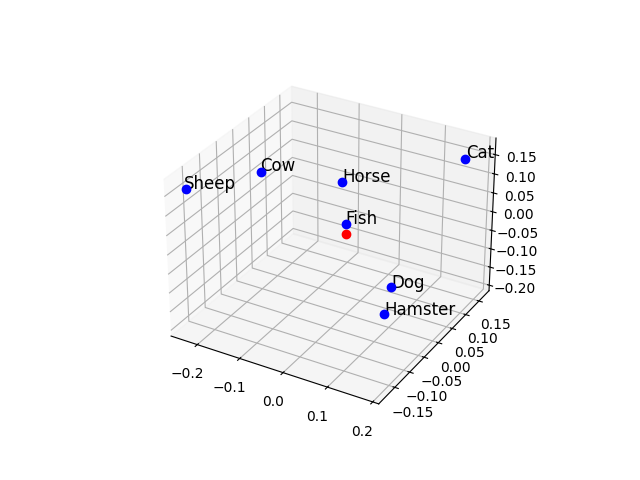

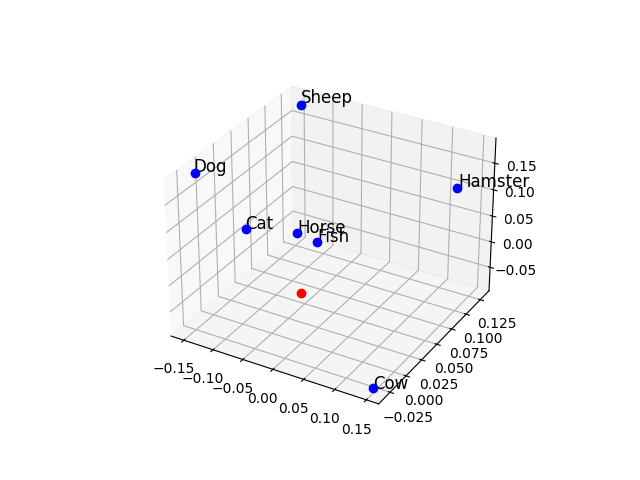

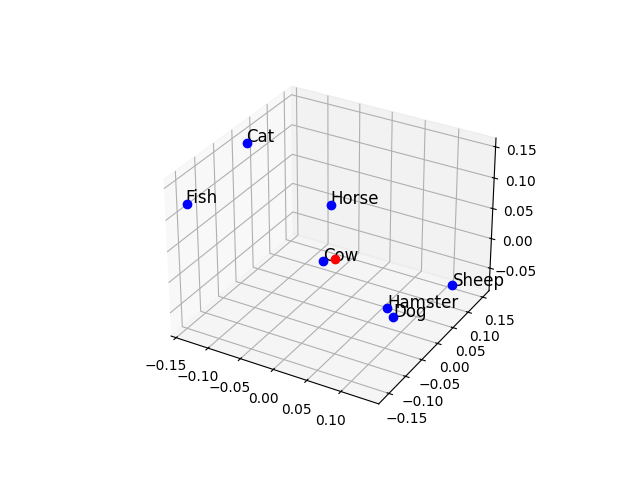

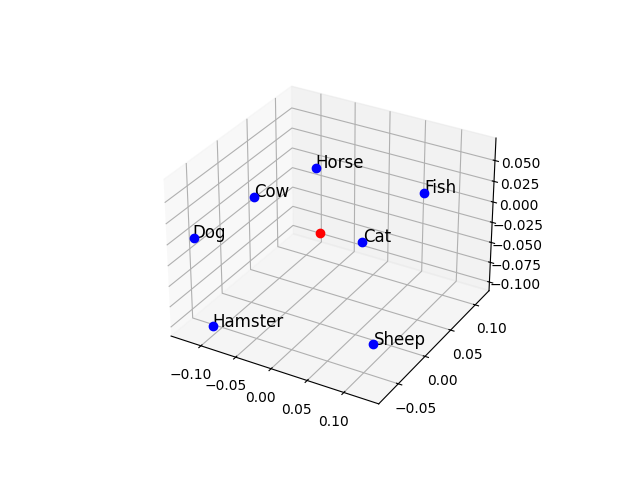

In [ ]:
corpus_minimal = [
    ["Dog"],
    ["Cat"],
    ["Hamster"],
    ["Fish"],
    ["Cow"],
    ["Sheep"],
    ["Horse"]
]
model, vocab, graph = train_and_plot(corpus_minimal, 2)
angle_between_vectors(model.wv["Dog"], model.wv["Cat"])

model, vocab, graph = train_and_plot(corpus_minimal, 3)
angle_between_vectors(model.wv["Dog"], model.wv["Cat"])

model, vocab, graph = train_and_plot(corpus_minimal, 4)
angle_between_vectors(model.wv["Dog"], model.wv["Cat"]) 

model, vocab, graph = train_and_plot(corpus_minimal, 5)
angle_between_vectors(model.wv["Dog"], model.wv["Cat"])

model, vocab, graph = train_and_plot(corpus_minimal, 6)
angle_between_vectors(model.wv["Dog"], model.wv["Cat"])

model, vocab, graph = train_and_plot(corpus_minimal, 7)
angle_between_vectors(model.wv["Dog"], model.wv["Cat"])
# as dimensions increase, vectors become close to othogonal - Not true anymore

Cosine similarity:  0.24534099
Angle:  75.798004
Cosine similarity:  -0.8131168
Angle:  144.40157
Cosine similarity:  -0.30909964
Angle:  108.004974
Cosine similarity:  -0.2391215
Angle:  103.83469
Cosine similarity:  0.32170224
Angle:  71.23409
Cosine similarity:  0.033150334
Angle:  88.10027
Cosine similarity:  0.13438085
Angle:  82.277176


82.277176

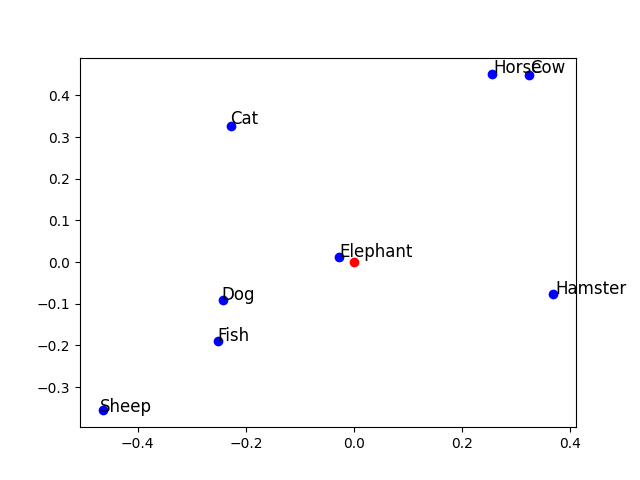

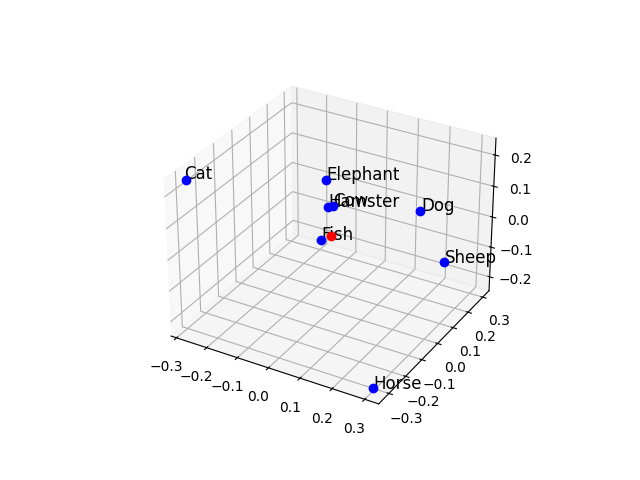

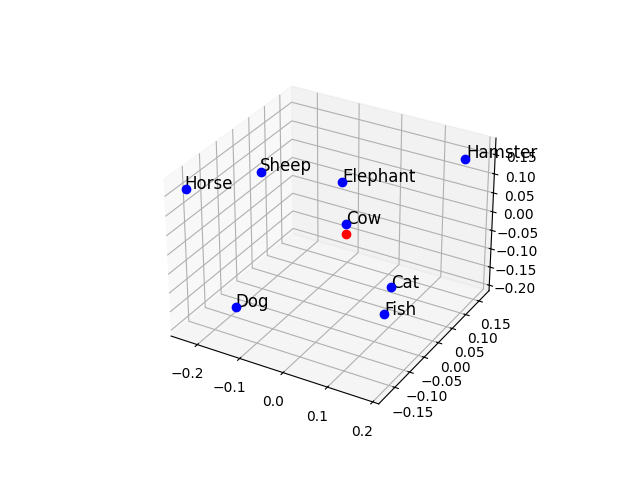

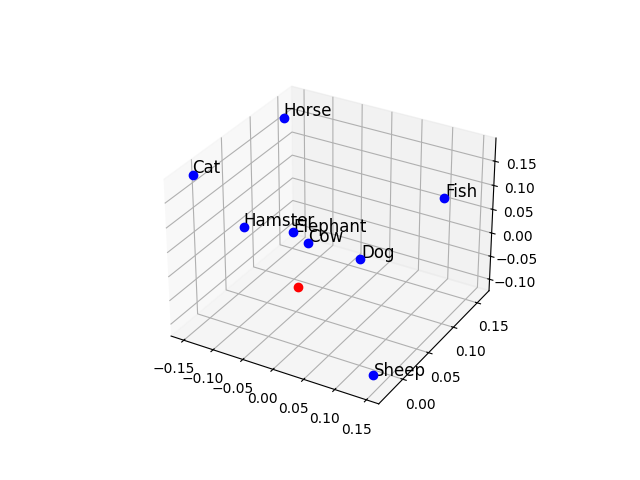

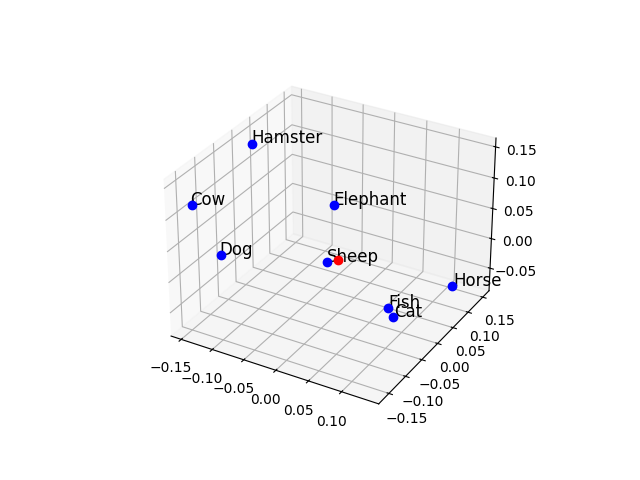

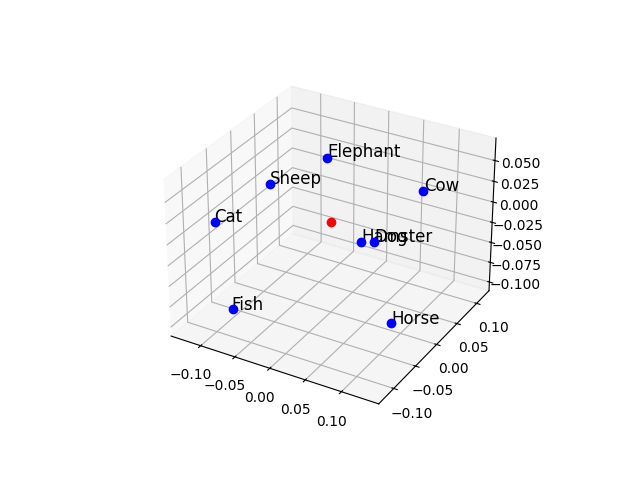

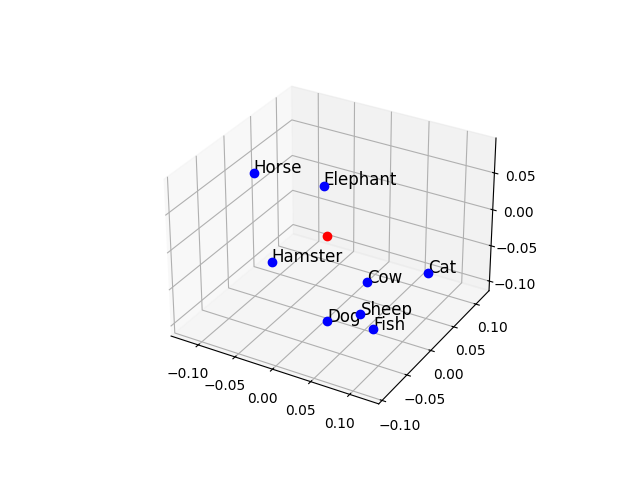

In [ ]:
corpus_minimal = [
    ["Dog"],
    ["Cat"],
    ["Hamster"],
    ["Fish"],
    ["Cow"],
    ["Sheep"],
    ["Horse"],
    ["Elephant"]
]
model, vocab, graph = train_and_plot(corpus_minimal, 2)
angle_between_vectors(model.wv["Dog"], model.wv["Cat"])

model, vocab, graph = train_and_plot(corpus_minimal, 3)
angle_between_vectors(model.wv["Dog"], model.wv["Cat"])

model, vocab, graph = train_and_plot(corpus_minimal, 4)
angle_between_vectors(model.wv["Dog"], model.wv["Cat"]) 

model, vocab, graph = train_and_plot(corpus_minimal, 5)
angle_between_vectors(model.wv["Dog"], model.wv["Cat"])

model, vocab, graph = train_and_plot(corpus_minimal, 6)
angle_between_vectors(model.wv["Dog"], model.wv["Cat"])

model, vocab, graph = train_and_plot(corpus_minimal, 7)
angle_between_vectors(model.wv["Dog"], model.wv["Cat"])

model, vocab, graph = train_and_plot(corpus_minimal, 8)
angle_between_vectors(model.wv["Dog"], model.wv["Cat"])
# as dimensions increase, vectors become close to othogonal - Not true anymore

NameError: name 'angle_between_vectors' is not defined

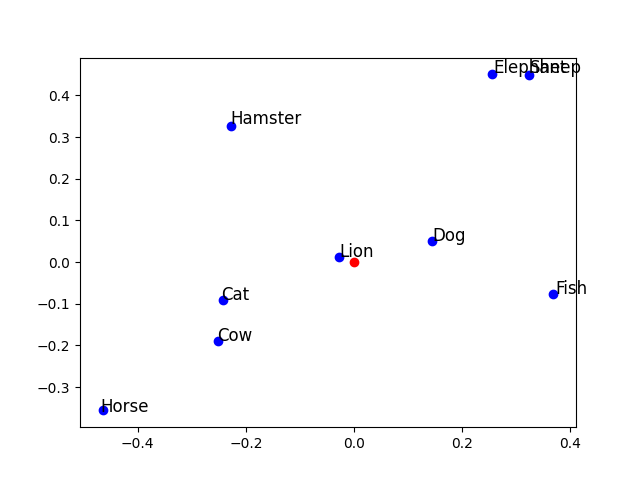

In [ ]:
corpus_minimal = [
    ["Dog"],
    ["Cat"],
    ["Hamster"],
    ["Fish"],
    ["Cow"],
    ["Sheep"],
    ["Horse"],
    ["Elephant"],
    ["Lion"]
]
model, vocab, graph = train_and_plot(corpus_minimal, 2)
angle_between_vectors(model.wv["Dog"], model.wv["Cat"])

model, vocab, graph = train_and_plot(corpus_minimal, 3)
angle_between_vectors(model.wv["Dog"], model.wv["Cat"])

model, vocab, graph = train_and_plot(corpus_minimal, 4)
angle_between_vectors(model.wv["Dog"], model.wv["Cat"]) 

model, vocab, graph = train_and_plot(corpus_minimal, 5)
angle_between_vectors(model.wv["Dog"], model.wv["Cat"])

model, vocab, graph = train_and_plot(corpus_minimal, 6)
angle_between_vectors(model.wv["Dog"], model.wv["Cat"])

model, vocab, graph = train_and_plot(corpus_minimal, 7)
angle_between_vectors(model.wv["Dog"], model.wv["Cat"])

model, vocab, graph = train_and_plot(corpus_minimal, 8)
angle_between_vectors(model.wv["Dog"], model.wv["Cat"])

model, vocab, graph = train_and_plot(corpus_minimal, 9)
angle_between_vectors(model.wv["Dog"], model.wv["Cat"])
# as dimensions increase, vectors become close to othogonal - Not true anymore

In [ ]:

corpus_minimal = [
    ["Dog"],
    ["Cat"],
    ["Hamster"],
]
model, vocab, graph = train_and_plot(corpus_minimal, 3, draw_graph=False)
average_angle(model, corpus_minimal)

model, vocab, graph = train_and_plot(corpus_minimal, 2, draw_graph=False)
average_angle(model, corpus_minimal)

Average angle:  109.03033192952473
Average angle:  104.6305300394694


104.6305300394694

In [ ]:
corpus_minimal = [
    ["Dog"],
    ["Cat"],
    ["Hamster"],
    ["Rabbit"]
]
model, vocab, graph = train_and_plot(corpus_minimal, 2, draw_graph=False)
average_angle(model, corpus_minimal)

model, vocab, graph = train_and_plot(corpus_minimal, 3, draw_graph=False)
average_angle(model, corpus_minimal)

model, vocab, graph = train_and_plot(corpus_minimal, 4, draw_graph=False)
average_angle(model, corpus_minimal)

Average angle:  97.53752708435059
Average angle:  103.47825050354004
Average angle:  83.68910217285156


83.68910217285156

In [ ]:
corpus_minimal = [
    ["Dog"],
    ["Cat"],
    ["Hamster"],
    ["Rabbit"],
    ["Lion"]
]
model, vocab, graph = train_and_plot(corpus_minimal, 2, draw_graph=False)
average_angle(model, corpus_minimal)

model, vocab, graph = train_and_plot(corpus_minimal, 3, draw_graph=False)
average_angle(model, corpus_minimal)

model, vocab, graph = train_and_plot(corpus_minimal, 4, draw_graph=False)
average_angle(model, corpus_minimal)

model, vocab, graph = train_and_plot(corpus_minimal, 5, draw_graph=False)
average_angle(model, corpus_minimal)

Average angle:  96.54772579073907
Average angle:  93.94533195495606
Average angle:  99.7900260925293
Average angle:  89.66956825256348


89.66956825256348

In [ ]:
corpus_minimal = [
    ["Dog"],
    ["Cat"],
    ["Hamster"],
    ["Rabbit"],
    ["Lion"],
    ["Elephant"]
]
model, vocab, graph = train_and_plot(corpus_minimal, 2, draw_graph=False)
average_angle(model, corpus_minimal)

model, vocab, graph = train_and_plot(corpus_minimal, 3, draw_graph=False)
average_angle(model, corpus_minimal)

model, vocab, graph = train_and_plot(corpus_minimal, 4, draw_graph=False)
average_angle(model, corpus_minimal)

model, vocab, graph = train_and_plot(corpus_minimal, 5, draw_graph=False)
average_angle(model, corpus_minimal)

model, vocab, graph = train_and_plot(corpus_minimal, 6, draw_graph=False)
average_angle(model, corpus_minimal)

Average angle:  102.25637316306432
Average angle:  88.26046969095866
Average angle:  98.86738739013671
Average angle:  86.17750651041666
Average angle:  98.5358373006185


98.5358373006185

In [ ]:
corpus_minimal = [
    ["Dog"],
    ["Cat"],
    ["Hamster"],
    ["Rabbit"],
    ["Lion"],
    ["Elephant"],
    ["Frog"]
]
model, vocab, graph = train_and_plot(corpus_minimal, 2, draw_graph=False)
average_angle(model, corpus_minimal)

model, vocab, graph = train_and_plot(corpus_minimal, 3, draw_graph=False)
average_angle(model, corpus_minimal)

model, vocab, graph = train_and_plot(corpus_minimal, 4, draw_graph=False)
average_angle(model, corpus_minimal)

model, vocab, graph = train_and_plot(corpus_minimal, 5, draw_graph=False)
average_angle(model, corpus_minimal)

model, vocab, graph = train_and_plot(corpus_minimal, 6, draw_graph=False)
average_angle(model, corpus_minimal)

model, vocab, graph = train_and_plot(corpus_minimal, 7, draw_graph=False)
average_angle(model, corpus_minimal)

Average angle:  96.25549121981575
Average angle:  94.30311902364095
Average angle:  97.87333679199219
Average angle:  82.16764949616932
Average angle:  98.16998890468052
Average angle:  79.90777624221076


79.90777624221076

In [ ]:
corpus_minimal = [
    ["Dog"],
    ["Cat"],
    ["Hamster"],
    ["Rabbit"],
    ["Lion"],
    ["Elephant"],
    ["Frog"],
    ["Snail"]
]
model, vocab, graph = train_and_plot(corpus_minimal, 2, draw_graph=False)
average_angle(model, corpus_minimal)

model, vocab, graph = train_and_plot(corpus_minimal, 3, draw_graph=False)
average_angle(model, corpus_minimal)

model, vocab, graph = train_and_plot(corpus_minimal, 4, draw_graph=False)
average_angle(model, corpus_minimal)

model, vocab, graph = train_and_plot(corpus_minimal, 5, draw_graph=False)
average_angle(model, corpus_minimal)

model, vocab, graph = train_and_plot(corpus_minimal, 6, draw_graph=False)
average_angle(model, corpus_minimal)

model, vocab, graph = train_and_plot(corpus_minimal, 7, draw_graph=False)
average_angle(model, corpus_minimal)

model, vocab, graph = train_and_plot(corpus_minimal, 8, draw_graph=False)
average_angle(model, corpus_minimal)

Average angle:  93.1712475908654
Average angle:  91.15498651776996
Average angle:  98.29807090759277
Average angle:  83.61534942899432
Average angle:  96.12288161686489
Average angle:  87.85211045401437
Average angle:  95.0244539805821


95.0244539805821

isn't it weird how it could represent the words all orthogonally but it doesn't? it that because of random initialisation or because of something else?

In [ ]:
corpus_minimal = [
    ["Dog"],
    ["Cat"],
    ["Hamster"],
    ["Rabbit"],
    ["Lion"],
    ["Elephant"],
    ["Frog"],
    ["Snail"],
    ["Mosquito"]
]
model, vocab, graph = train_and_plot(corpus_minimal, 2, draw_graph=False)
average_angle(model, corpus_minimal)

model, vocab, graph = train_and_plot(corpus_minimal, 3, draw_graph=False)
average_angle(model, corpus_minimal)

model, vocab, graph = train_and_plot(corpus_minimal, 4, draw_graph=False)
average_angle(model, corpus_minimal)

model, vocab, graph = train_and_plot(corpus_minimal, 5, draw_graph=False)
average_angle(model, corpus_minimal)

model, vocab, graph = train_and_plot(corpus_minimal, 6, draw_graph=False)
average_angle(model, corpus_minimal)

model, vocab, graph = train_and_plot(corpus_minimal, 7, draw_graph=False)
average_angle(model, corpus_minimal)

model, vocab, graph = train_and_plot(corpus_minimal, 8, draw_graph=False)
average_angle(model, corpus_minimal)

model, vocab, graph = train_and_plot(corpus_minimal, 9, draw_graph=False)
average_angle(model, corpus_minimal)

Average angle:  96.1490355382363
Average angle:  93.74269511964586
Average angle:  97.39608912997775
Average angle:  85.00553888744778
Average angle:  95.44772624969482
Average angle:  87.13245148128934
Average angle:  93.77178541819255
Average angle:  90.37880251142714


90.37880251142714

In [ ]:
corpus_minimal = [
    ["Dog"],
    ["Cat"],
    ["Hamster"],
    ["Rabbit"],
    ["Lion"],
    ["Elephant"],
    ["Frog"],
    ["Snail"],
    ["Mosquito"],
    ["Buffalo"]
]
model, vocab, graph = train_and_plot(corpus_minimal, 2, draw_graph=False)
average_angle(model, corpus_minimal)

model, vocab, graph = train_and_plot(corpus_minimal, 3, draw_graph=False)
average_angle(model, corpus_minimal)

model, vocab, graph = train_and_plot(corpus_minimal, 4, draw_graph=False)
average_angle(model, corpus_minimal)

model, vocab, graph = train_and_plot(corpus_minimal, 5, draw_graph=False)
average_angle(model, corpus_minimal)

model, vocab, graph = train_and_plot(corpus_minimal, 6, draw_graph=False)
average_angle(model, corpus_minimal)

model, vocab, graph = train_and_plot(corpus_minimal, 7, draw_graph=False)
average_angle(model, corpus_minimal)

model, vocab, graph = train_and_plot(corpus_minimal, 8, draw_graph=False)
average_angle(model, corpus_minimal)

model, vocab, graph = train_and_plot(corpus_minimal, 9, draw_graph=False)
average_angle(model, corpus_minimal)

model, vocab, graph = train_and_plot(corpus_minimal, 10, draw_graph=False)
average_angle(model, corpus_minimal)

Average angle:  95.6003216041459
Average angle:  94.80446355607775
Average angle:  95.40464596218533
Average angle:  88.82507676018609
Average angle:  94.17204530504014
Average angle:  88.54024980333116
Average angle:  94.24082658555773
Average angle:  89.85029813978407
Average angle:  92.57940402560764


92.57940402560764